In [1]:
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.SIM928_voltage_source import SIM # as DC
from nanodrivers.visa_drivers.vna import VNA

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize
from scipy.fft import fft, ifft, fftshift, ifftshift


#file_store
import os

#time
import time
from datetime import datetime, timedelta


from ctypes import *
%matplotlib inline

Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'TWPA_noise_8'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_8 already exists


In [2]:
dc = SIM()
dc.idn()

Connection exist: Stanford_Research_Systems,SIM928,s/n004757,ver1.1



In [20]:
dc.disconnect()

SIM928 is now disconnected from SIM900 mainframe


In [3]:
vna = VNA()
vna.idn()

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



In [5]:
anapico = ANAPICO()
anapico.idn()

Connection exist: AnaPico AG,APMS20G,3C6-0B4F40003-0985,1.0.7



# Check TWPA gain

In [10]:
dc.set_volt(0)
vna.set_power(0)
time.sleep(60)
mag_ref, pha_ref = vna.get_data()

In [11]:
freq = vna.get_freq()
dc.set_volt(2)
dc.set_on()
time.sleep(60)
mag, pha = vna.get_data()

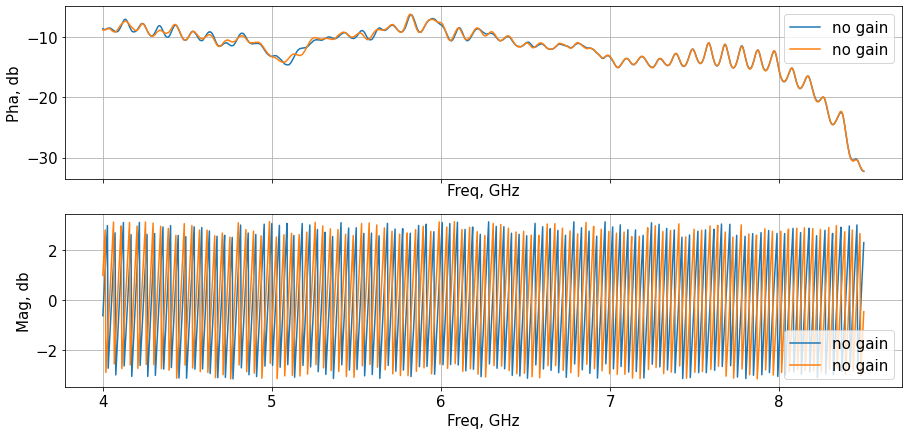

In [12]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(2, 1, figsize = (15, 7), sharex = True)
ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Freq, GHz')
ax[0].set_ylabel('Pha, db')
ax[1].set_xlabel('Freq, GHz')
ax[1].set_ylabel('Mag, db')

ax[1].plot(freq/1e9, pha_ref, label = 'no gain')
ax[0].plot(freq/1e9, mag_ref, label = 'no gain')

ax[1].plot(freq/1e9, pha, label = 'no gain')
ax[0].plot(freq/1e9, mag, label = 'no gain')
ax[0].legend()
ax[1].legend()
dc.set_off()

# 1st tone

In [6]:
path = adress +'\\'+ '1st_tone'
if not os.path.exists(path):
  os.mkdir(path)
  print("Folder %s created!" % path)
else:
  print("Folder %s already exists" % path)

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_8\1st_tone created!


New round 0/201 (0.0 V) started at 12:23:42


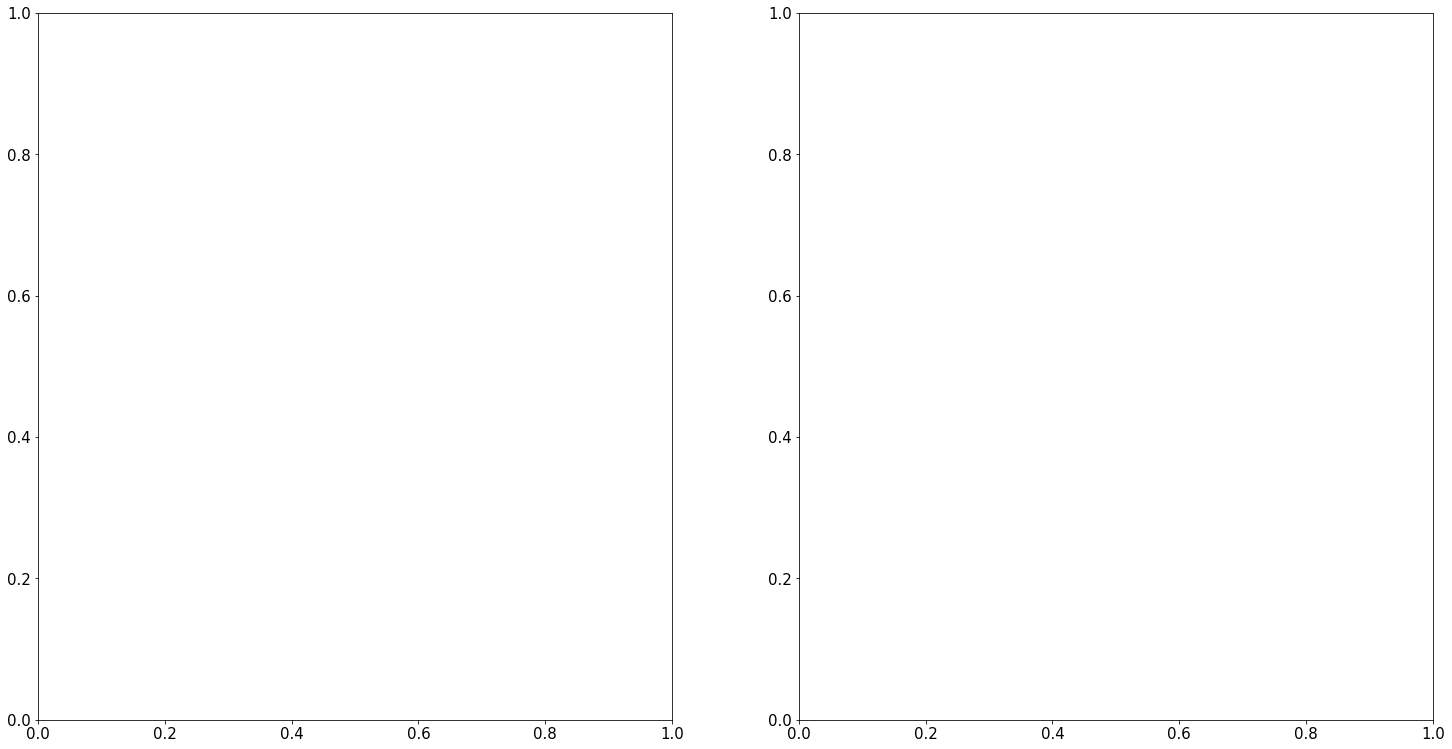

New round 1/201 (0.025 V) started at 12:24:04
New round 2/201 (0.05 V) started at 12:24:26
New round 3/201 (0.07500000000000001 V) started at 12:24:48
New round 4/201 (0.1 V) started at 12:25:10
New round 5/201 (0.125 V) started at 12:25:32
New round 6/201 (0.15000000000000002 V) started at 12:25:54
New round 7/201 (0.17500000000000002 V) started at 12:26:16
New round 8/201 (0.2 V) started at 12:26:38
New round 9/201 (0.225 V) started at 12:26:59
New round 10/201 (0.25 V) started at 12:27:21
New round 11/201 (0.275 V) started at 12:27:43
New round 12/201 (0.30000000000000004 V) started at 12:28:05
New round 13/201 (0.325 V) started at 12:28:27
New round 14/201 (0.35000000000000003 V) started at 12:28:49
New round 15/201 (0.375 V) started at 12:29:11
New round 16/201 (0.4 V) started at 12:29:32
New round 17/201 (0.42500000000000004 V) started at 12:29:54
New round 18/201 (0.45 V) started at 12:30:16
New round 19/201 (0.47500000000000003 V) started at 12:30:38
New round 20/201 (0.5 V) st

New round 160/201 (4.0 V) started at 13:22:02
New round 161/201 (4.025 V) started at 13:22:24
New round 162/201 (4.05 V) started at 13:22:46
New round 163/201 (4.075 V) started at 13:23:08
New round 164/201 (4.1000000000000005 V) started at 13:23:30
New round 165/201 (4.125 V) started at 13:23:52
New round 166/201 (4.15 V) started at 13:24:13
New round 167/201 (4.175 V) started at 13:24:35
New round 168/201 (4.2 V) started at 13:24:57
New round 169/201 (4.2250000000000005 V) started at 13:25:19
New round 170/201 (4.25 V) started at 13:25:41
New round 171/201 (4.275 V) started at 13:26:03
New round 172/201 (4.3 V) started at 13:26:25
New round 173/201 (4.325 V) started at 13:26:47
New round 174/201 (4.3500000000000005 V) started at 13:27:08
New round 175/201 (4.375 V) started at 13:27:30
New round 176/201 (4.4 V) started at 13:27:52
New round 177/201 (4.425 V) started at 13:28:14
New round 178/201 (4.45 V) started at 13:28:36
New round 179/201 (4.4750000000000005 V) started at 13:28:58


In [12]:
# %matplotlib qt
from IPython.display import display, clear_output
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 2, figsize=(25,13))

volts = np.linspace(-5, 5, 201)
vna.set_band(50)
vna.set_nop(1001)
vna.set_lin()
vna.set_freq_start_stop(4e9, 8.5e9, vna.get_nop())
vna.set_power(-10)
# anapico.set_off(1)

freqs = vna.get_freq()

state = dict()
state['freqs'] = freqs
state['volts'] = volts
# state['vna'] = vna.dump
state['DC_dev'] = dc.dump
# state['anapico'] = anapico.dump()
state['temp'] = 9
state['VNAPower'] = vna.get_power()


mag_1t = np.ones((len(volts),len(freqs)))*(-40)
pha_1t = np.ones((len(volts),len(freqs)))*(0)

state['mag'] = mag_1t
state['pha'] = pha_1t

start_time = datetime.now()
file = r'1st_tone_test_with_filter_no_cap_'+ start_time.strftime(r'%Y-%m-%d-%H-%M-%S') + '.mat'
file_name = path +'\\' + file

start_time = datetime.now()     
dc.set_volt(volts[0], sudo=True)
dc.set_on()
time.sleep(5)

for i in range(len(volts)):
    
    curr_time = datetime.now()
    print('New round {}/{} ({} V) started at {}'.format(i, len(volts), volts[i], curr_time.strftime(r'%H:%M:%S')))
                      
    mag_1t[i], pha_1t[i] = vna.get_data()
    
    state['mag'] = mag_1t
    state['pha'] = pha_1t
    
    savemat(file_name, state)
#     ax[0].cla()
#     c = ax[0].pcolor(volts, freqs/1e9,  np.transpose(mag_1t), cmap='viridis')
#     ax[0].set_xlabel(r'Bias, V')
#     ax[0].set_ylabel(r'Probe frequency, GHz')
    
#     ax[1].cla()
#     c1 = ax[1].pcolor(volts, freqs/1e9,  np.transpose(pha_1t), cmap='viridis')
#     ax[1].set_xlabel(r'Bias, V')
#     ax[1].set_ylabel(r'Probe frequency, GHz')
    
#     plt.savefig(path +'\\' + '1st_tone_with_filter_with_cap_'+ start_time.strftime(r'%Y-%m-%d-%H-%M-%S') + '.png', dpi=150)
    

    
#     if i == 0: 
#         ax[0].set_title(r'$|S_{21}|$')
#         ax[1].set_title(r'$\angle S_{21} $')

#         duration_end = datetime.now()
#         period = (duration_end-start_time).seconds
        
#         fig.colorbar(c, ax=ax[0])
#         fig.colorbar(c1, ax=ax[1])
        
#         print('Duration: {}. End of script in: {}'.format(duration_end - start_time, 
#                                         timedelta(seconds=period*len(volts))))
    
#     display(fig)
#     clear_output(wait = True)
    
    if i<len(volts)-1:
        dc.set_volt(np.round(volts[i+1], 5), sudo=False)
        plt.pause(0.5)

state['mag'] = mag_1t
state['pha'] = pha_1t
savemat(file_name, state)

dc.set_volt(0)   
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [14]:
dc.set_volt(0)

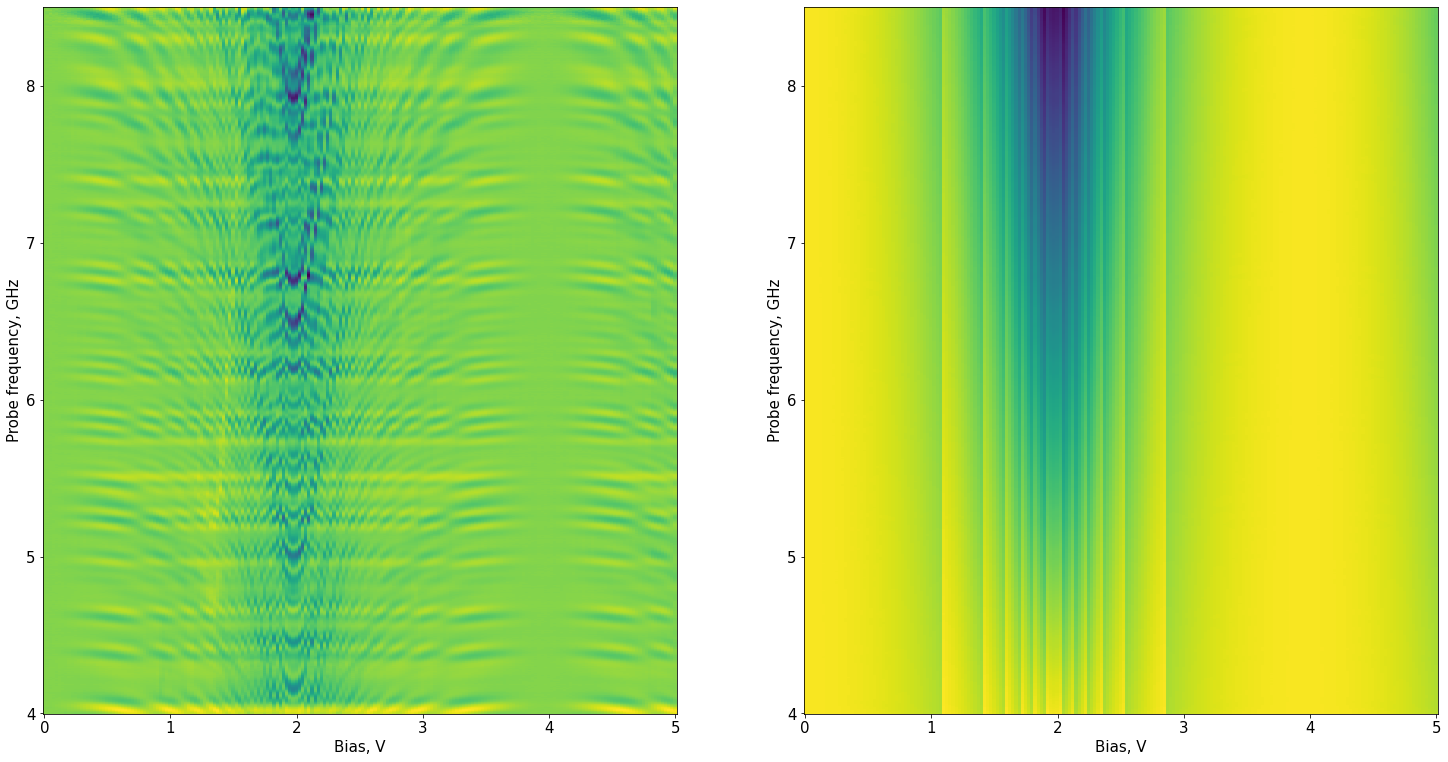

In [13]:
from IPython.display import display, clear_output
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 2, figsize=(25,13))

c = ax[0].pcolor(volts, freqs/1e9,  np.transpose(mag_1t-mag_1t[0]), cmap='viridis')
ax[0].set_xlabel(r'Bias, V')
ax[0].set_ylabel(r'Probe frequency, GHz')

c1 = ax[1].pcolor(volts, freqs/1e9,  np.transpose(np.unwrap(pha_1t-pha_1t[0])), cmap='viridis')
ax[1].set_xlabel(r'Bias, V')
ax[1].set_ylabel(r'Probe frequency, GHz')
plt.savefig(path +'\\' + '1st_tone_with_filter_no_cap_'+ start_time.strftime(r'%Y-%m-%d-%H-%M-%S') + '.png', dpi=150)


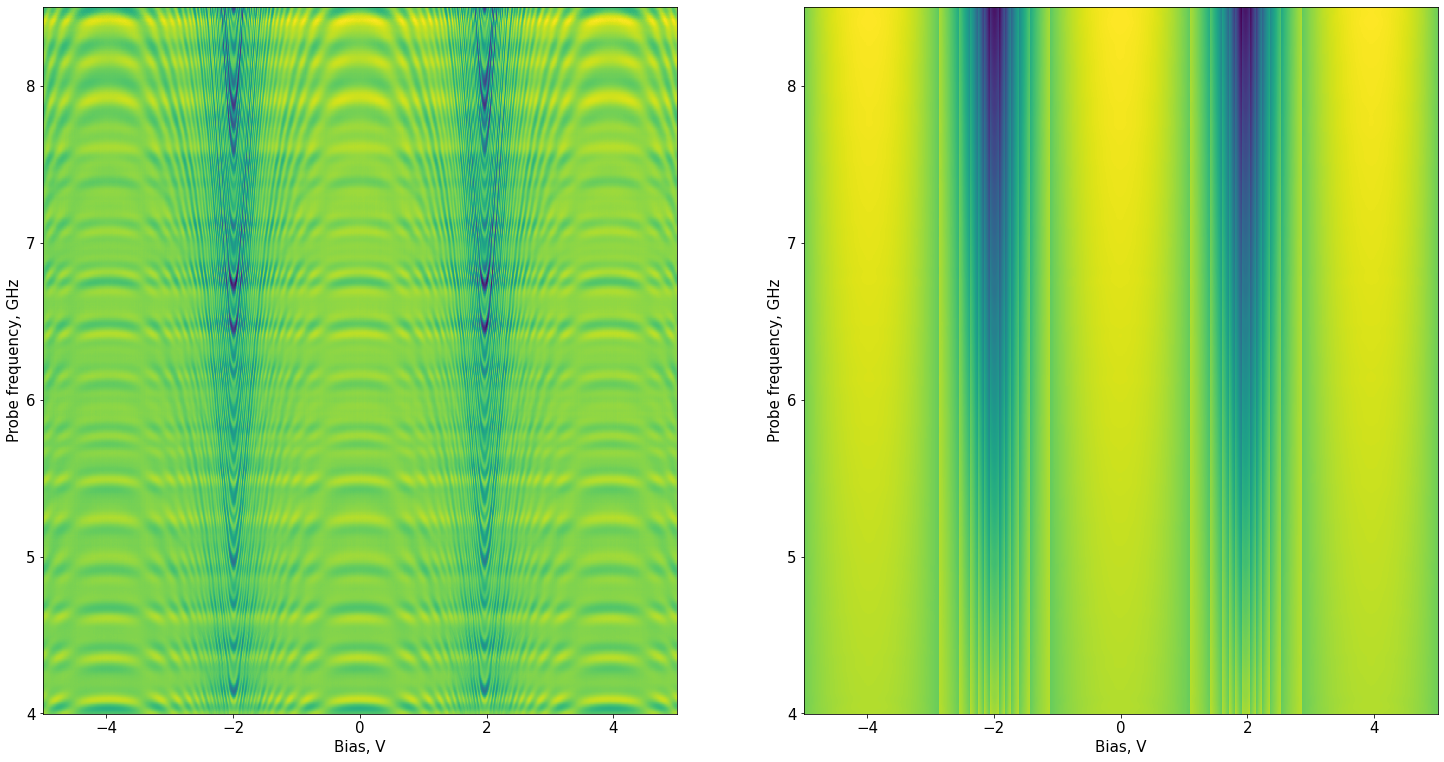

In [15]:
from IPython.display import display, clear_output
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 2, figsize=(25,13))

c = ax[0].pcolor(volts, freqs/1e9,  np.transpose(mag_1t-mag_1t[100]), cmap='viridis')
ax[0].set_xlabel(r'Bias, V')
ax[0].set_ylabel(r'Probe frequency, GHz')

c1 = ax[1].pcolor(volts, freqs/1e9,  np.transpose(np.unwrap(pha_1t-pha_1t[0])), cmap='viridis')
ax[1].set_xlabel(r'Bias, V')
ax[1].set_ylabel(r'Probe frequency, GHz')
plt.savefig(path +'\\' + '1st_tone_with_filter_with_cap_'+ start_time.strftime(r'%Y-%m-%d-%H-%M-%S') + '.png', dpi=150)


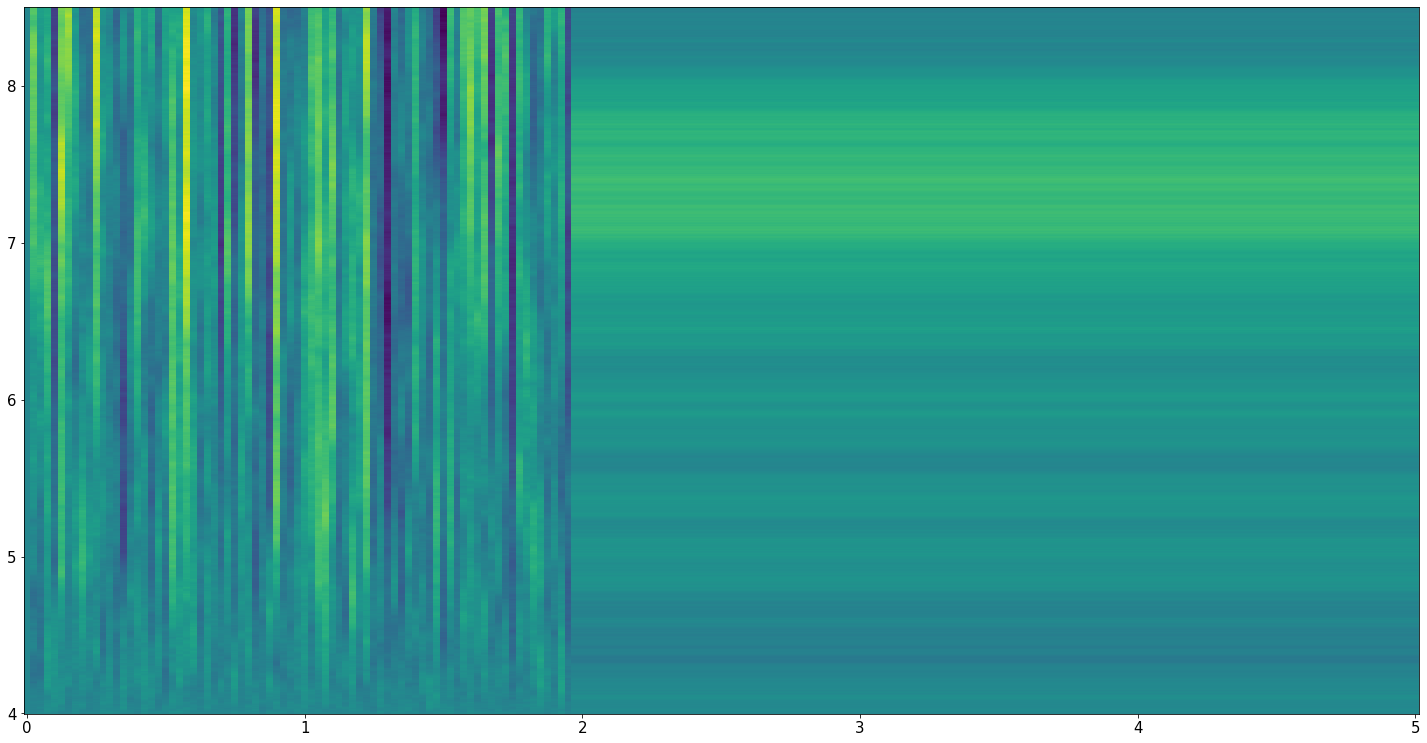

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(25,13))


c1 = ax.pcolor(volts, freqs/1e9,  np.transpose(np.unwrap(pha_1t-pha_1t[0])), cmap='viridis')

<Figure size 432x288 with 0 Axes>

In [19]:
dc.set_volt()

(8001,)

In [169]:
5*10/15*700/500

4.666666666666667

In [186]:
dc.get_volt()

0.351

In [185]:
dc.set_volt(0.2515644515451545) 


In [84]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, figsize=(25,13), sharex = True)
ax.cla()
ax.set_xlabel(r'Bias, V')
ax.set_ylabel(r'Probe frequency, GHz')

ref_pha = pha_1t[0]
fixed_pha = pha_1t-ref_pha

c = ax.pcolor(volts, freqs/1e9, np.transpose(fixed_pha), cmap='jet')
fig.colorbar(c, ax=ax)



In [69]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, figsize=(25,13), sharex = True)

ax.cla()
c = ax.pcolor(volts, freqs/1e9,  np.transpose(mag_1t-np.linspace(mag_1t[0], mag_1t[-1], len(mag_1t))), cmap='jet_r')
ax.set_xlabel(r'Bias, V')
ax.set_ylabel(r'Probe frequency, GHz')

Text(0, 0.5, 'Probe frequency, GHz')

In [77]:
ref_pha = pha_1t[0]
fixed_pha = pha_1t-ref_pha
fixed_pha.shape

(1501, 1001)

In [93]:
a1 = np.array([1.243, 1.527, 1.811, 2.018, 3.322, 3.615, 3.880])
b1 = np.array([a1[1]-a1[0],a1[2]-a1[1],a1[3]-a1[2],a1[4]-a1[5],a1[5]-a1[6]])
np.round(b1,3)

array([ 0.284,  0.284,  0.207, -0.293, -0.265])

# Study phase stability

In [94]:
path = adress +'\\'+ '1st_tone_noise'
if not os.path.exists(path):
  os.mkdir(path)
  print("Folder %s created!" % path)
else:
  print("Folder %s already exists" % path)

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_4\1st_tone_noise created!


In [105]:
%matplotlib qt

In [190]:
def fft_A(A):
    fft_A = abs(fftshift(fft(A))**2)
    return fft_A

def fft_f(bandwidth=100, nop=1001):
    f = np.linspace(-bandwidth/2, bandwidth/2, nop)
    return f

def dbtomag(db):
    return 10 ** (db / 10)

In [154]:
dc.set_volt(0)

In [191]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 2, figsize=(25,13))

volts = np.linspace(0, 4, 801)
vna.set_band(10)
vna.set_nop(101)
vna.set_cw_freq(5e9)
freqs = vna.get_freq()

state = dict()
state['freqs'] = freqs
state['volts'] = volts
state['DC_dev'] = dc.dump
anapico.set_off(1)
state['anapico'] = anapico.dump()
state['temp'] = 35

fft_freq = fft_f(bandwidth=vna.get_band(), nop=vna.get_nop())[int(vna.get_nop()/2+1):]
state['fft_freq'] = fft_freq

fft_mag = np.ones((len(volts),len(fft_freq)))*(0.0001)
fft_pha = np.ones((len(volts),len(fft_freq)))*(0.1)

state['fft_mag'] = fft_mag
state['fft_pha'] = fft_pha

start_time = datetime.now()
file = r'1st_tone_noise_test_with_filter_with_cap_'+ start_time.strftime(r'%Y-%m-%d-%H-%M-%S') + '.mat'
file_name = path +'\\' + file

start_time = datetime.now()     
dc.set_volt(volts[0])
dc.set_on()
plt.pause(5)


for i in range(len(volts)):
    
    curr_time = datetime.now()
    print('New round {}/{} ({} V) started at {}'.format(i, len(volts), volts[i], curr_time.strftime(r'%H:%M:%S')))      
    
    mag, pha = vna.get_data()
    fft_mag[i,:], fft_pha[i,:] = fft_A(dbtomag(mag-np.mean(mag)))[int(len(mag)/2+1):], fft_A(pha-np.mean(pha))[int(len(mag)/2+1):]

    state['fft_mag'] = fft_mag
    state['fft_pha'] = fft_pha

    
    savemat(file_name, state)
    ax[0].cla()
    c = ax[0].pcolor(fft_freq, volts, np.log10(fft_mag), cmap='viridis')
    ax[0].set_xscale('log')
    ax[0].set_ylabel(r'Bias, V')
    ax[0].set_xlabel(r'fft frequency, GHz')
    
    ax[1].cla()
    c1 = ax[1].pcolor(fft_freq, volts,  np.log10(fft_pha), cmap='viridis')
    ax[1].set_xscale('log')
    ax[1].set_ylabel(r'Bias, V')
    ax[1].set_xlabel(r'fft frequency, GHz')
    
    plt.savefig(path +'\\' + '1st_tone_noise_with_filter_with_cap_'+ start_time.strftime(r'%Y-%m-%d-%H-%M-%S') + '.png', dpi=150)

    if i == 0: 
        ax[0].set_title(r'$|S_{21}|$')
        ax[1].set_title(r'$\angle S_{21} $')
        fig.colorbar(c, ax=ax[0])
        fig.colorbar(c1, ax=ax[1])
        duration_end = datetime.now()
        period = (duration_end-start_time).seconds
        
        print('Duration: {}. End of script in: {}'.format(duration_end - start_time, 
                                        timedelta(seconds=period*len(volts))))
    
    display(fig)
    clear_output(wait = True)
    
    if i<len(volts)-1:
        dc.set_volt(np.round(volts[i+1], 5)) 
        plt.pause(15)

    
dc.set_volt(0)   
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 7:46:32.299618


In [3]:
fig, ax = plt.subplots(2, 1, figsize=(25,13), sharex = True)
c1 = ax[0].pcolor(np.linspace(0, 7, 701), np.linspace(4.5, 8.5, 1001)/1e9,  np.unwrap(np.transpose(pha_1t-pha_1t[0])), cmap='viridis')
ax[1].plot(np.linspace(0, 4, 801)[2:], fft_mag[2:,2])
fig.colorbar(c, ax=ax[0])
ax[0].grid()

NameError: name 'plt' is not defined

In [192]:
fft_pha.shape

(801, 50)

In [210]:
pha_1t.shape

(701, 1001)